In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [3]:
df_tesla = pd.read_csv("TSLA.csv", parse_dates=["Date"], index_col="Date")
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# EDA

In [4]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


In [5]:
#Convert all the coloum to lower case
df_tesla.columns = df_tesla.columns.str.lower().str.replace(" ", "_")
df_tesla.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [6]:
df_tesla.isnull().sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [8]:
#Geturns get returns
df_tesla["returns"] = df_tesla["close"].pct_change()

df_tesla.head()

,open,high,low,close,adj_close,volume,returns
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,-0.002511
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,-0.078473
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,-0.125683
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,-0.160937


In [9]:
#Convert to series
y_tesla = pd.Series(df_tesla["returns"]).dropna().sort_index(ascending=False)
y_tesla

Date
2020-02-03    0.198949
2020-01-31    0.015231
2020-01-30    0.102962
2020-01-29    0.024854
2020-01-28    0.015913
                ...   
2010-07-07   -0.019243
2010-07-06   -0.160937
2010-07-02   -0.125683
2010-07-01   -0.078473
2010-06-30   -0.002511
Name: returns, Length: 2415, dtype: float64

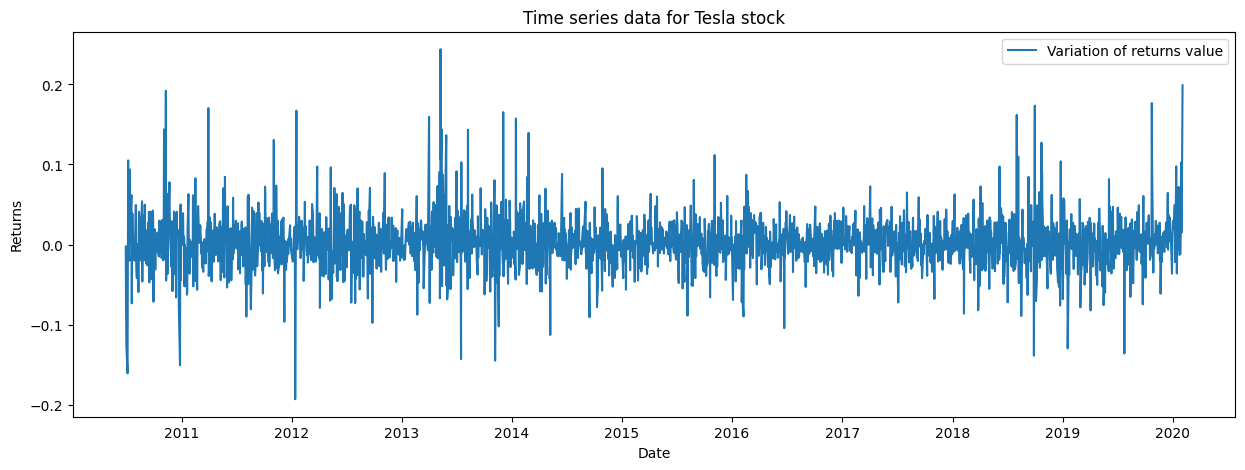

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_tesla, label="Variation of returns value")

plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Time series data for Tesla stock")
plt.legend();

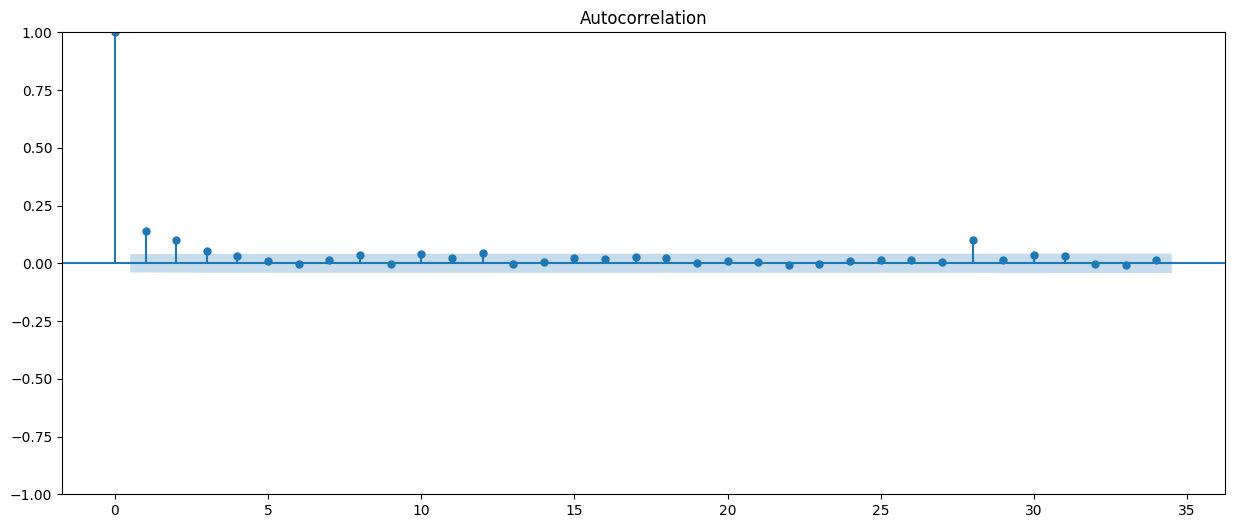

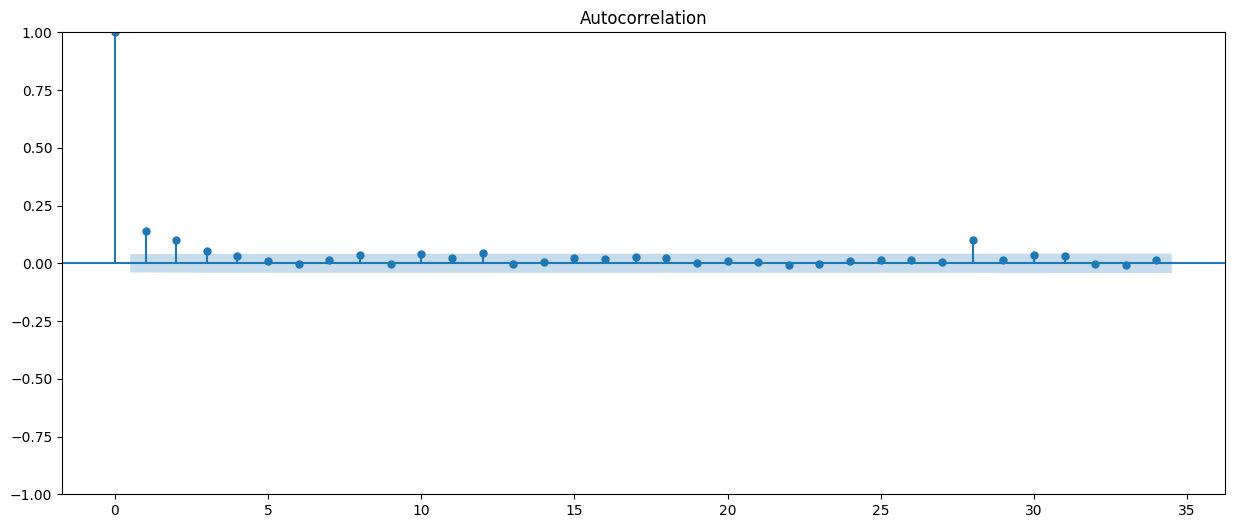

In [17]:
#Plot the square of the pac and pacf
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_tesla ** 2, ax=ax)

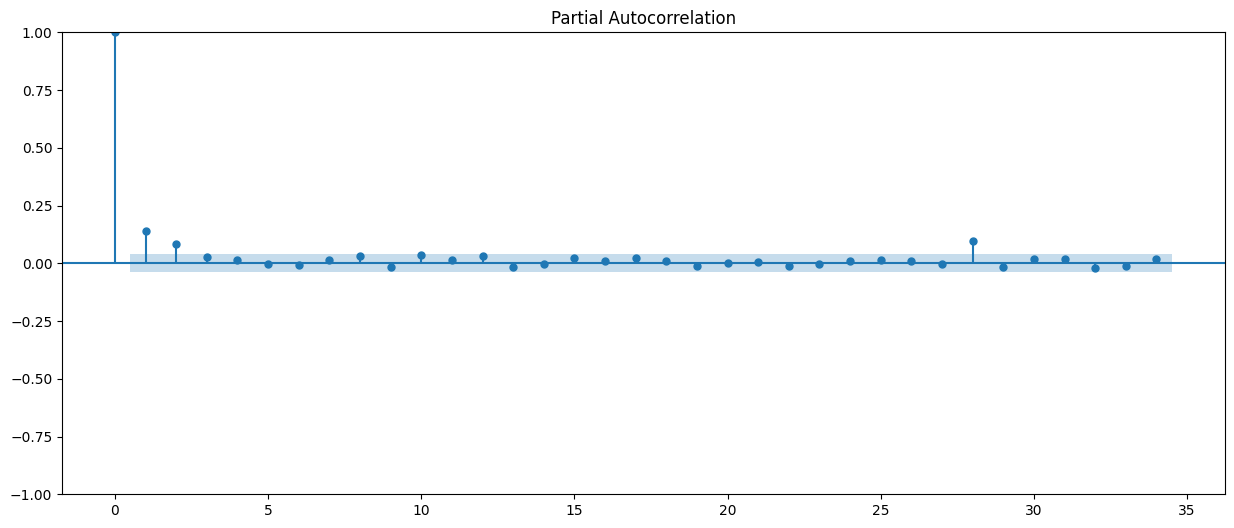

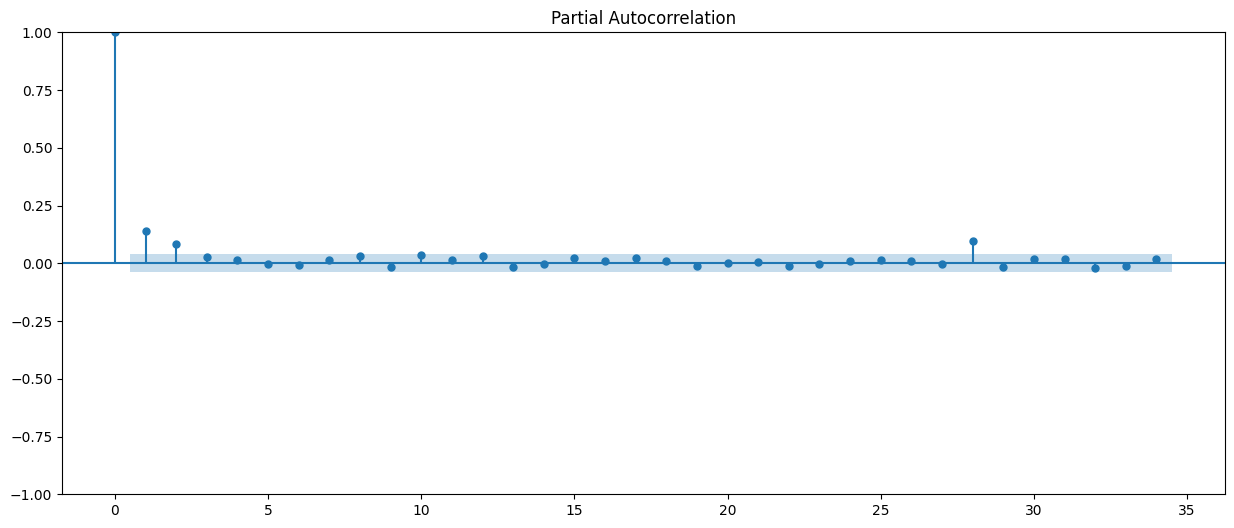

In [18]:
#Plot the square of the pac and pacf
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y_tesla ** 2, ax=ax)

# Split Data

In [22]:
cutoff_test = int(len(y_tesla) * 0.8)
y_tesla_train = y_tesla.iloc[:cutoff_test]

In [26]:
# # # Generate 5-day volatility forecast
# # prediction = model.forecast(horizon=5, reindex=False).variance ** 0.5
# # print(prediction)

# # # Calculate forecast start date
# # start = ...

# # # Create date range
# # prediction_dates = ...

# # # Create prediction index labels, ISO 8601 format
# # prediction_index = ...

# # print("prediction_index type:", type(prediction_index))
# # print("prediction_index len:", len(prediction_index))
# # prediction_index[:3]



# # Create empty list to hold predictions
# predictions = []

# # Calculate size of test data (20%)
# test_size = int(len(y_ambuja) * 0.2)

# # Walk forward
# for i in range(test_size):
#     # Create test data
#     y_train = y_ambuja.iloc[: -(test_size - i)]

#     # Train model
#     model = ...

#     # Generate next prediction (volatility, not variance)
#     next_pred = ... #this is done by taking the variance of the forcase and squred

#     # Append prediction to list
#     predictions.append(next_pred)

# # Create Series from predictions list
# y_test_wfv = pd.Series(predictions, index=y_ambuja.tail(test_size).index)

# print("y_test_wfv type:", type(y_test_wfv))
# print("y_test_wfv shape:", y_test_wfv.shape)
# y_test_wfv.head()

# Build Model